In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import base64
from matplotlib import animation
from matplotlib import cm
from matplotlib.pyplot import *
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from dateutil import parser
from IPython.display import HTML
from subprocess import check_output
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['patch.force_edgecolor'] = 'True'
plt.rcParams['figure.figsize'] = (16,10)
plt.rcParams['axes.unicode_minus'] = False

In [136]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
df_train.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

In [36]:
df_train.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.458644e+06     1.458644e+06      1.458644e+06     1.458644e+06   
mean   1.534950e+00     1.664530e+00     -7.397349e+01     4.075092e+01   
std    4.987772e-01     1.314242e+00      7.090186e-02     3.288119e-02   
min    1.000000e+00     0.000000e+00     -1.219333e+02     3.435970e+01   
25%    1.000000e+00     1.000000e+00     -7.399187e+01     4.073735e+01   
50%    2.000000e+00     1.000000e+00     -7.398174e+01     4.075410e+01   
75%    2.000000e+00     2.000000e+00     -7.396733e+01     4.076836e+01   
max    2.000000e+00     9.000000e+00     -6.133553e+01     5.188108e+01   

       dropoff_longitude  dropoff_latitude  trip_duration  log_trip duration  \
count       1.458644e+06      1.458644e+06   1.458644e+06       1.458644e+06   
mean       -7.397342e+01      4.075180e+01   9.594923e+02       6.466978e+00   
std         7.064327e-02      3.589056e-02   5.237432e+03       7.957595e-01   
min        -1.219333e+02      3.218114e+01   1.000000e+00       6.931472e-01   
25%        -7.399133e+01      4.073588e+01   3.970000e+02       5.986452e+00   
50%        -7.397975e+01      4.075452e+01   6.620000e+02       6.496775e+00   
75%        -7.396301e+01      4.076981e+01   1.075000e+03       6.981006e+00   
max        -6.133553e+01      4.392103e+01   3.526282e+06       1.507575e+01   

          pickup_hr    pickup_min    pickup_sec    dropoff_hr   dropoff_min  \
count  1.458644e+06  1.458644e+06  1.458644e+06  1.458644e+06  1.458644e+06   
mean   1.360648e+01  2.959016e+01  2.947359e+01  1.359890e+01  2.962843e+01   
std    6.399693e+00  1.732471e+01  1.731985e+01  6.483682e+00  1.742023e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    9.000000e+00  1.500000e+01  1.400000e+01  9.000000e+00  1.500000e+01   
50%    1.400000e+01  3.000000e+01  2.900000e+01  1.400000e+01  3.000000e+01   
75%    1.900000e+01  4.500000e+01  4.400000e+01  1.900000e+01  4.500000e+01   
max    2.300000e+01  5.900000e+01  5.900000e+01  2.300000e+01  5.900000e+01   

        dropoff_sec    pickup_day  pickup_month  pickup_year   dropoff_day  \
count  1.458644e+06  1.458644e+06  1.458644e+06    1458644.0  1.458644e+06   
mean   2.950982e+01  3.050375e+00  3.516818e+00       2016.0  3.054422e+00   
std    1.731977e+01  1.954039e+00  1.681038e+00          0.0  1.956599e+00   
min    0.000000e+00  0.000000e+00  1.000000e+00       2016.0  0.000000e+00   
25%    1.500000e+01  1.000000e+00  2.000000e+00       2016.0  1.000000e+00   
50%    2.900000e+01  3.000000e+00  4.000000e+00       2016.0  3.000000e+00   
75%    4.500000e+01  5.000000e+00  5.000000e+00       2016.0  5.000000e+00   
max    5.900000e+01  6.000000e+00  6.000000e+00       2016.0  6.000000e+00   

       dropoff_month  dropoff_year  
count   1.458644e+06     1458644.0  
mean    3.517178e+00        2016.0  
std     1.681217e+00           0.0  
min     1.000000e+00        2016.0  
25%     2.000000e+00        2016.0  
50%     4.000000e+00        2016.0  
75%     5.000000e+00        2016.0  
max     7.000000e+00        2016.0

<function matplotlib.pyplot.show(*args, **kw)>

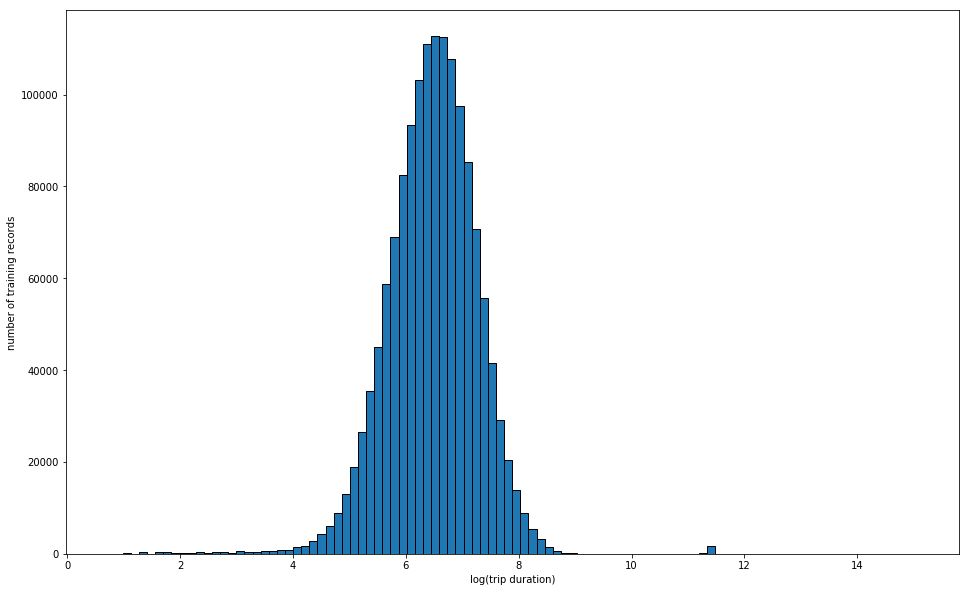

In [6]:
df_train['log_trip duration'] = np.log(df_train['trip_duration'].values + 1)
plt.hist(df_train['log_trip duration'].values, bins=100)
plt.xlabel("log(trip duration)")
plt.ylabel('number of training records')
plt.show

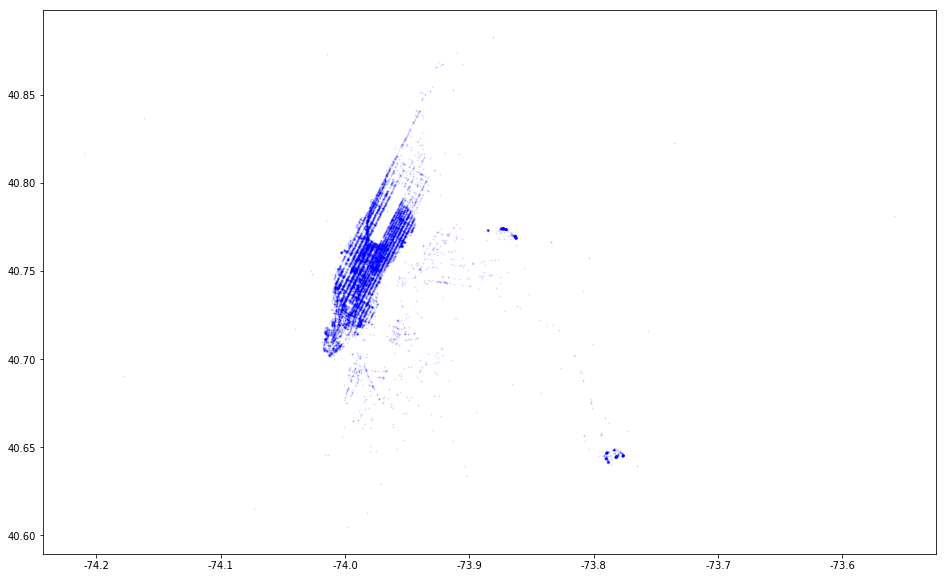

In [83]:
#Ignore tHis
N = 20000
city_long_border = (-75, -75)
city_lat_border = (40,40)
fig,ax = plt.subplots(ncols=1)
ax.scatter(df_train['pickup_longitude'].values[:N],
             df_train['pickup_latitude'].values[:N],
             color='blue',s=1,label='train',alpha=0.1)

plt.show()

In [16]:
type(df_train['pickup_datetime'])

pandas.core.series.Series

In [97]:
df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'])

In [98]:
df_train['dropoff_datetime'] = pd.to_datetime(df_train['dropoff_datetime'])

In [99]:
df_train['pickup_hr'] = df_train['pickup_datetime'].apply(lambda time:time.hour)
df_train['pickup_min'] = df_train['pickup_datetime'].apply(lambda time:time.minute)
df_train['pickup_sec'] = df_train['pickup_datetime'].apply(lambda time:time.second)

In [100]:
df_train['dropoff_hr'] = df_train['dropoff_datetime'].apply(lambda time:time.hour)
df_train['dropoff_min'] = df_train['dropoff_datetime'].apply(lambda time:time.minute)
df_train['dropoff_sec'] = df_train['dropoff_datetime'].apply(lambda time:time.second)

In [101]:
df_train['pickup_day'] = df_train['pickup_datetime'].apply(lambda time:time.dayofweek)
df_train['pickup_month'] = df_train['pickup_datetime'].apply(lambda time:time.month)
df_train['pickup_year'] = df_train['pickup_datetime'].apply(lambda time:time.year)
df_train['dropoff_day'] = df_train['dropoff_datetime'].apply(lambda time:time.dayofweek)
df_train['dropoff_month'] = df_train['dropoff_datetime'].apply(lambda time:time.month)
df_train['dropoff_year'] = df_train['dropoff_datetime'].apply(lambda time:time.year)

In [102]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
df_train['Pickup Day of Week'] = df_train['pickup_day'].map(dmap)
df_train['Dropoff Day of Week'] = df_train['dropoff_day'].map(dmap)

In [103]:
df_train.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  ...  dropoff_min  dropoff_sec  \
0         40.765602                  N  ...           32           30   
1         40.731152                  N  ...           54           38   
2         40.710087                  N  ...           10           48   
3         40.706718                  N  ...           39           40   
4         40.782520                  N  ...           38           10   

   pickup_day  pickup_month  pickup_year  dropoff_day  dropoff_month  \
0           0             3         2016            0              3   
1           6             6         2016            6              6   
2           1             1         2016            1              1   
3           2             4         2016            2              4   
4           5             3         2016            5              3   

   dropoff_year  Pickup Day of Week  Dropoff Day of Week  
0          2016                 Mon                  Mon  
1          2016                 Sun                  Sun  
2          2016                 Tue                  Tue  
3          2016                 Wed                  Wed  
4          2016                 Sat                  Sat  

[5 rows x 25 columns]

In [24]:
df_train[df_train['Pickup Day of Week']!= df_train['Dropoff Day of Week']].head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
86   id0283075          1 2016-04-06 23:42:26 2016-04-07 00:12:08   
531  id3307903          2 2016-02-20 04:03:06 2016-02-21 03:33:00   
607  id3885431          1 2016-03-02 23:41:50 2016-03-03 00:10:43   
615  id1074936          1 2016-05-29 23:55:03 2016-05-30 00:00:21   
722  id2704068          2 2016-03-05 23:39:44 2016-03-06 00:05:47   

     passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
86                 1        -73.782478        40.644646         -73.981125   
531                3        -74.008102        40.741489         -74.009956   
607                2        -73.788261        40.647362         -74.007446   
615                1        -73.971924        40.747356         -73.979996   
722                1        -73.972359        40.765221         -73.955238   

     dropoff_latitude store_and_fwd_flag  ...  dropoff_min  dropoff_sec  \
86          40.720886                  N  ...           12            8   
531         40.714611                  N  ...           33            0   
607         40.577190                  N  ...           10           43   
615         40.733524                  N  ...            0           21   
722         40.720089                  N  ...            5           47   

     pickup_day  pickup_month  pickup_year  dropoff_day  dropoff_month  \
86            2             4         2016            3              4   
531           5             2         2016            6              2   
607           2             3         2016            3              3   
615           6             5         2016            0              5   
722           5             3         2016            6              3   

     dropoff_year  Pickup Day of Week  Dropoff Day of Week  
86           2016                 Wed                 Thur  
531          2016                 Sat                  Sun  
607          2016                 Wed                 Thur  
615          2016                 Sun                  Mon  
722          2016                 Sat                  Sun  

[5 rows x 26 columns]

In [34]:
df_train[df_train['Pickup Day of Week']!= df_train['Dropoff Day of Week']].describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  16511.000000     16511.000000      16511.000000     16511.000000   
mean       1.591787         1.745321        -73.965500        40.741049   
std        0.491518         1.358422          0.056865         0.034499   
min        1.000000         0.000000        -75.238327        39.923027   
25%        1.000000         1.000000        -73.993187        40.726799   
50%        2.000000         1.000000        -73.984497        40.745708   
75%        2.000000         2.000000        -73.968880        40.762123   
max        2.000000         6.000000        -73.640869        40.898426   

       dropoff_longitude  dropoff_latitude  trip_duration  log_trip duration  \
count       16511.000000      16511.000000   1.651100e+04       16511.000000   
mean          -73.965868         40.744618   1.190764e+04           7.473017   
std             0.049482          0.046622   4.751315e+04           1.566381   
min           -76.135719         40.243626   2.900000e+01           3.401197   
25%           -73.990387         40.720264   7.365000e+02           6.603266   
50%           -73.976959         40.747009   1.206000e+03           7.095893   
75%           -73.951725         40.767948   1.948000e+03           7.575072   
max           -72.711395         41.319832   3.526282e+06          15.075755   

          pickup_hr    pickup_min    pickup_sec    dropoff_hr   dropoff_min  \
count  16511.000000  16511.000000  16511.000000  16511.000000  16511.000000   
mean      21.833444     46.773908     29.771546      1.569984     11.556901   
std        3.849626     12.414419     17.358249      4.893220     11.820724   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       23.000000     42.000000     15.000000      0.000000      3.000000   
50%       23.000000     51.000000     30.000000      0.000000      8.000000   
75%       23.000000     56.000000     45.000000      0.000000     16.000000   
max       23.000000     59.000000     59.000000     23.000000     59.000000   

        dropoff_sec    pickup_day  pickup_month  pickup_year   dropoff_day  \
count  16511.000000  16511.000000  16511.000000      16511.0  16511.000000   
mean      28.503664      3.282236      3.641027       2016.0      3.639755   
std       17.421697      1.770079      1.671208          0.0      1.930144   
min        0.000000      0.000000      1.000000       2016.0      0.000000   
25%       13.000000      2.000000      2.000000       2016.0      2.000000   
50%       28.000000      4.000000      4.000000       2016.0      4.000000   
75%       44.000000      5.000000      5.000000       2016.0      5.000000   
max       59.000000      6.000000      6.000000       2016.0      6.000000   

       dropoff_month  dropoff_year  
count   16511.000000       16511.0  
mean        3.672885        2016.0  
std         1.684472           0.0  
min         1.000000        2016.0  
25%         2.000000        2016.0  
50%         4.000000        2016.0  
75%         5.000000        2016.0  
max         7.000000        2016.0

In [37]:
len(df_train[df_train['Pickup Day of Week']!= df_train['Dropoff Day of Week']])

16511

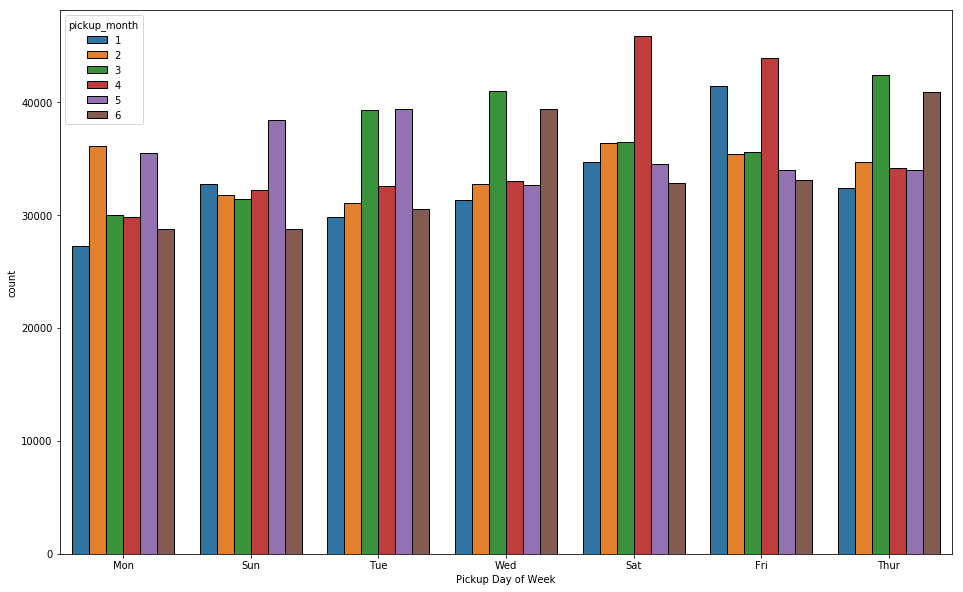

In [38]:
sns.countplot('Pickup Day of Week',data=df_train, hue='pickup_month')

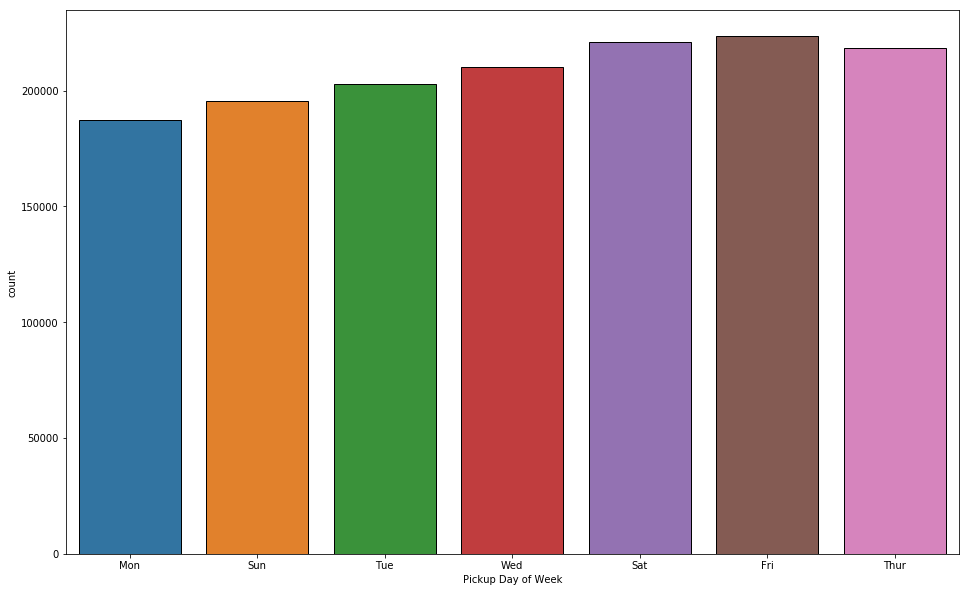

In [39]:
sns.countplot('Pickup Day of Week',data=df_train)

In [40]:
df_train['Date'] = df_train['pickup_datetime'].apply(lambda t: t.date())

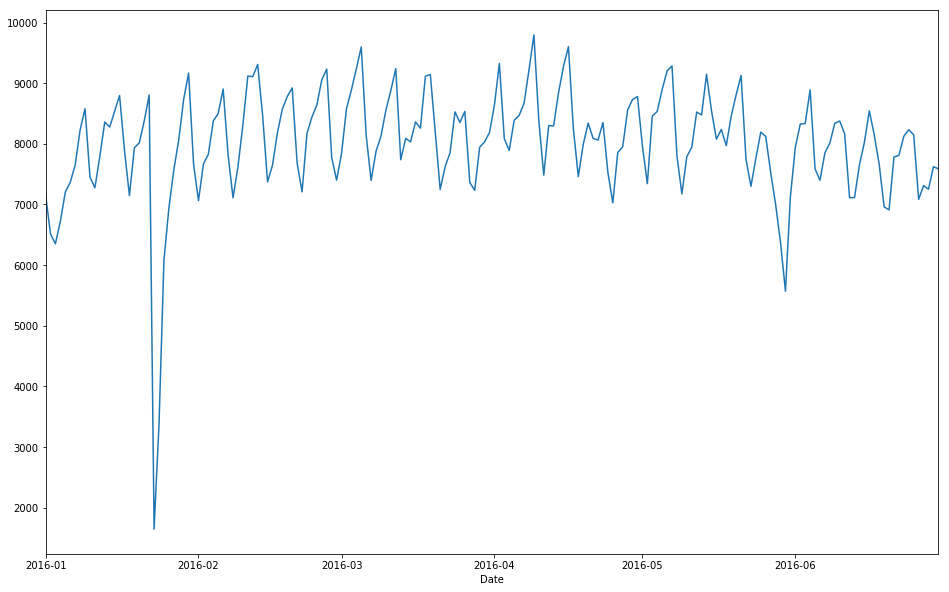

In [41]:
df_train.groupby('Date').count()['id'].plot()

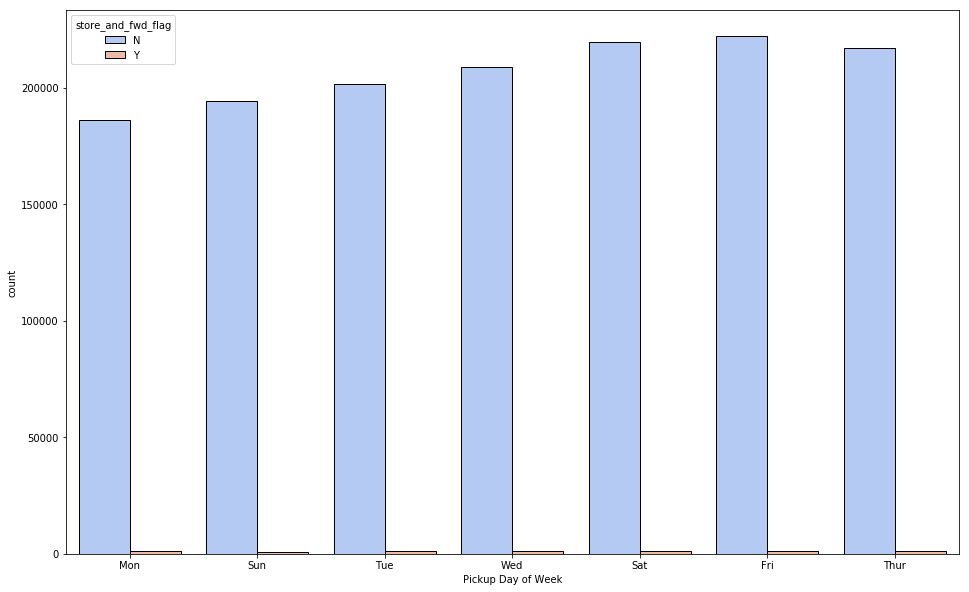

In [42]:
sns.countplot('Pickup Day of Week',data=df_train,hue='store_and_fwd_flag',palette='coolwarm')

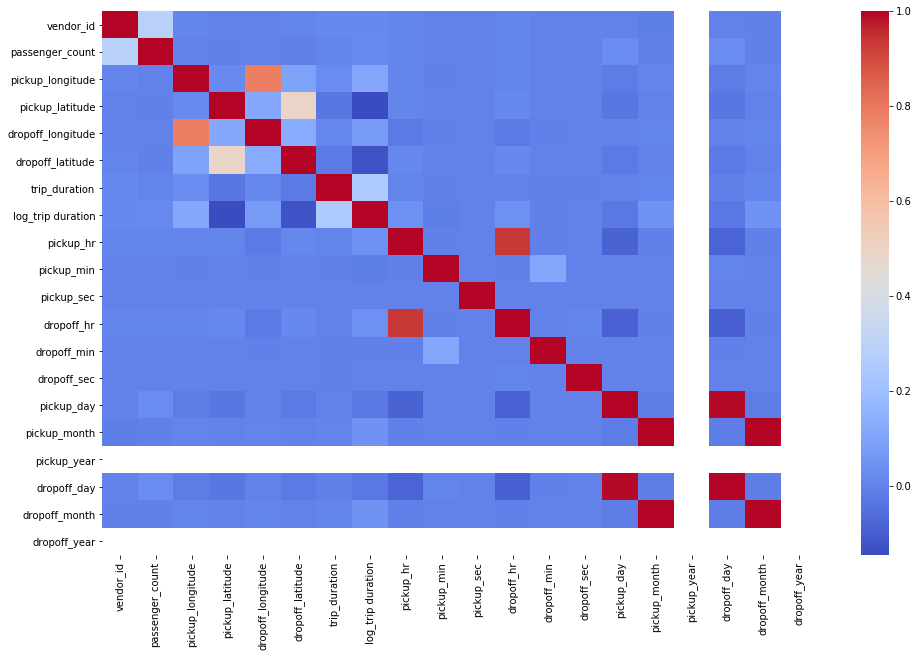

In [43]:
sns.heatmap(df_train.corr(),cmap='coolwarm')

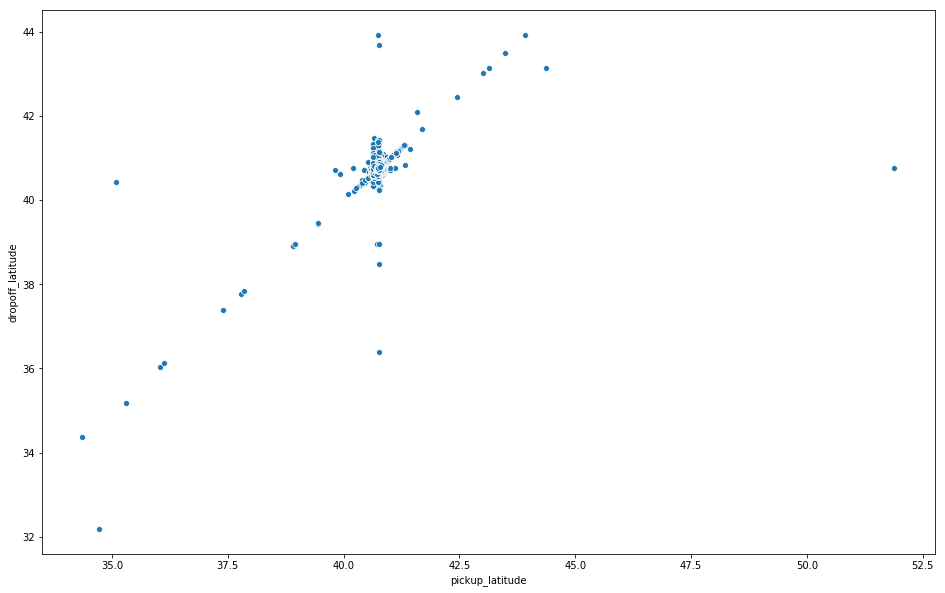

In [44]:
sns.scatterplot(x='pickup_latitude',y='dropoff_latitude',data=df_train)

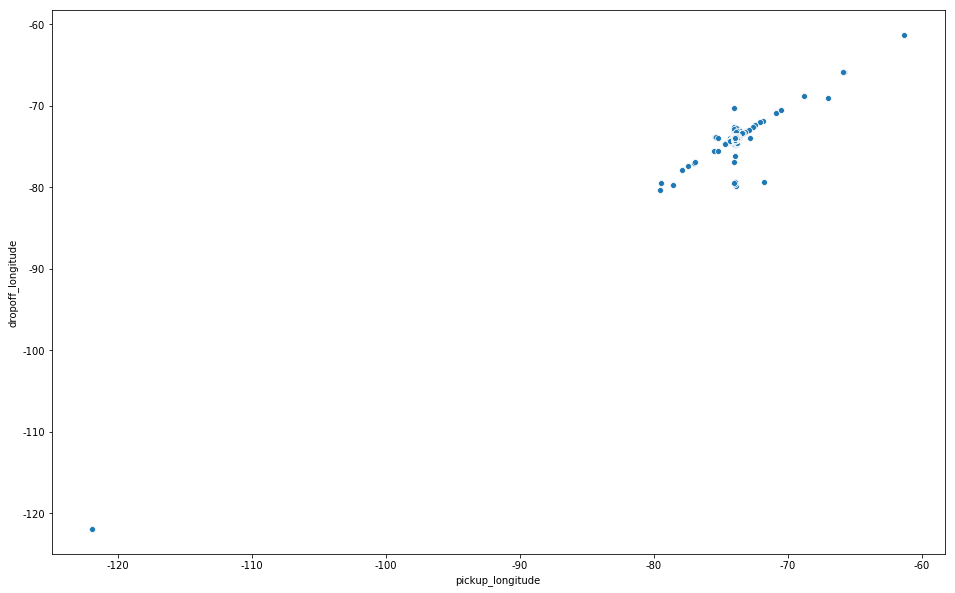

In [45]:
sns.scatterplot(x='pickup_longitude',y='dropoff_longitude',data=df_train)

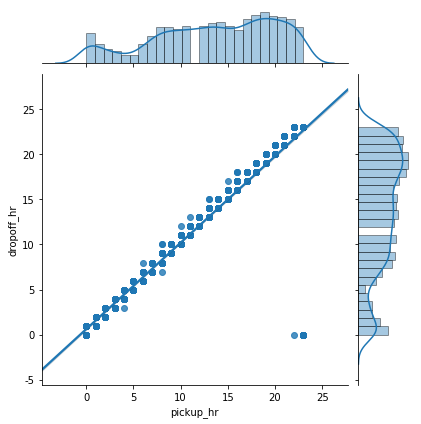

In [60]:
sns.jointplot(x='pickup_hr',y='dropoff_hr',data=df_train[:10000],kind = "reg")

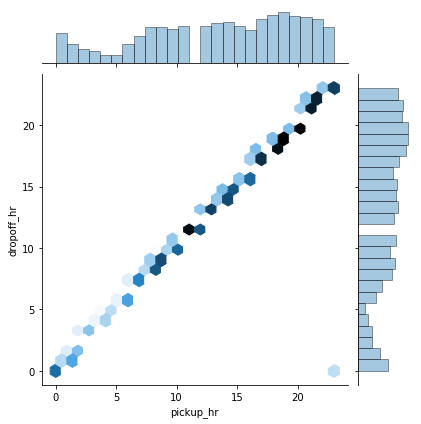

In [61]:
# IDK if it is good.....
sns.jointplot(x='pickup_hr',y='dropoff_hr',data=df_train[:10000],kind = "hex")

In [119]:
xlim = [-74.03, -73.77]
ylim = [40.63, 40.85]

df_train = df_train[(df_train.pickup_longitude> xlim[0]) & (df_train.pickup_longitude < xlim[1])]
df_train = df_train[(df_train.dropoff_longitude> xlim[0]) & (df_train.dropoff_longitude < xlim[1])]
df_train = df_train[(df_train.pickup_latitude> ylim[0]) & (df_train.pickup_latitude < ylim[1])]
df_train = df_train[(df_train.dropoff_latitude> ylim[0]) & (df_train.dropoff_latitude < ylim[1])]

longitude = list(df_train.pickup_longitude) + list(df_train.dropoff_longitude)
latitude = list(df_train.pickup_latitude) + list(df_train.dropoff_latitude)

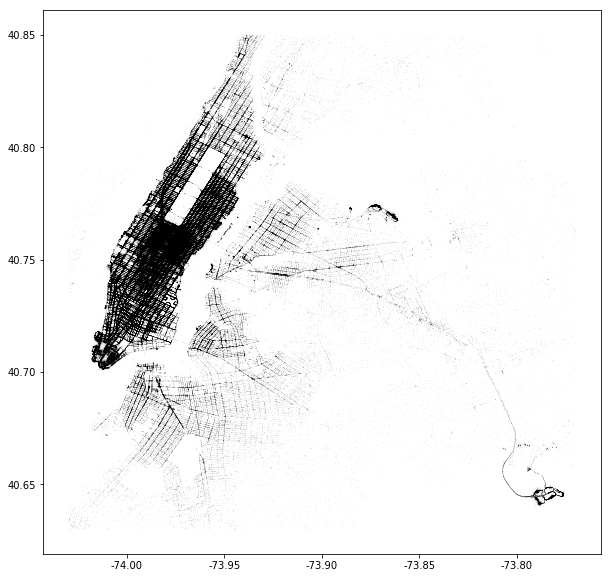

In [120]:
plt.figure(figsize = (10,10))
plt.plot(longitude,latitude,'.', alpha = 0.4, markersize = 0.05,color="black")
plt.show()

In [137]:
km_df = pd.DataFrame()
km_df['longitude'] = longitude
km_df['latitude'] = latitude

#### Now we will cluster the NYC map based on the cabs pick up and drop off points...

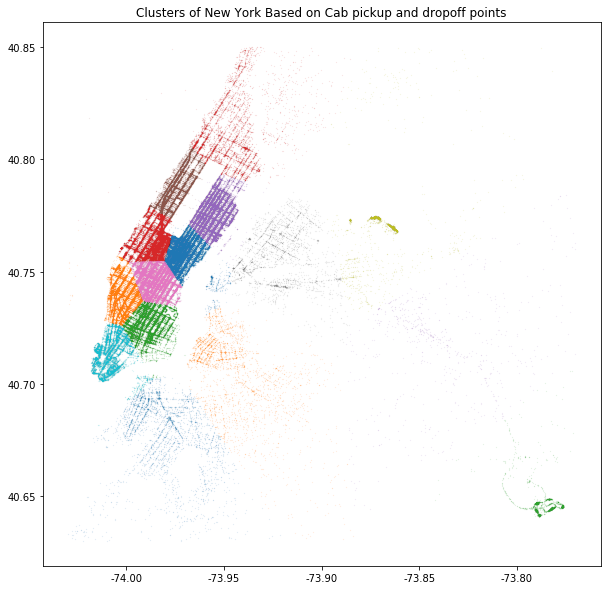

In [138]:
kmeans = KMeans(n_clusters=15, random_state=2, n_init = 10).fit(km_df)
km_df['label'] = kmeans.labels_

km_df = km_df.sample(200000)
plt.figure(figsize = (10,10))
for label in km_df.label.unique():
    plt.plot(km_df.longitude[km_df.label == label],km_df.latitude[km_df.label == label],'.', alpha = 0.3, markersize = 0.3)

plt.title('Clusters of New York Based on Cab pickup and dropoff points')
plt.show()

As we can see, the clustering results in a partition which is somewhat similar to the way NY is divided into different neighborhoods. We can see Upper East and West side of Central park in gray and pink respectively. West midtown in blue, Chelsea and West Village in brown, downtown area in blue, East Village and SoHo in purple.

The airports JFK and La LaGuardia have there own cluster, and so do Queens and Harlem. Brooklyn is divided into 2 clusters, and the Bronx has too few rides to be separated from Harlem.

Let's plot the cluster centers:

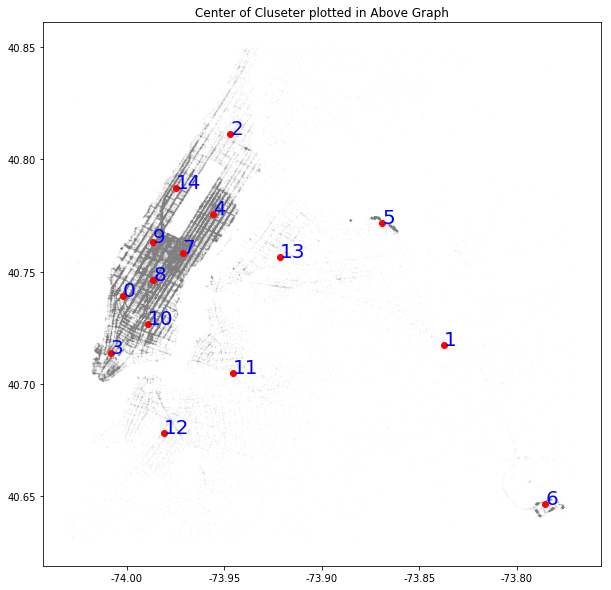

In [111]:
fig,ax = plt.subplots(figsize = (10,10))
for label in km_df.label.unique():
    ax.plot(km_df.longitude[km_df.label == label],km_df.latitude[km_df.label == label],'.', alpha = 0.4, markersize = 0.1, color = 'gray')
    ax.plot(kmeans.cluster_centers_[label,0],kmeans.cluster_centers_[label,1],'o', color = 'r')
    ax.annotate(label, (kmeans.cluster_centers_[label,0],kmeans.cluster_centers_[label,1]), color = 'b', fontsize = 20)
ax.set_title('Center of Clusters')
plt.show()

### Taxi rides from one cluster to another

 And the following animation, every arrow represents rides from one cluster to another. The width of the arrow is proportional to the relative amount of trips in the relevant hour.

In [139]:
df_train['pickup_cluster'] = kmeans.predict(df_train[['pickup_longitude','pickup_latitude']])
df_train['dropoff_cluster'] = kmeans.predict(df_train[['dropoff_longitude','dropoff_latitude']])
df_train['pickup_hour'] = df_train.pickup_datetime.apply(lambda x: parser.parse(x).hour )
clusters = pd.DataFrame()
clusters['x'] = kmeans.cluster_centers_[:,0]
clusters['y'] = kmeans.cluster_centers_[:,1]
clusters['label'] = range(len(clusters))
km_df = km_df.sample(5000)

MovieWriter imagemagick unavailable. Trying to use pillow instead.
/Users/shaswatrajput/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



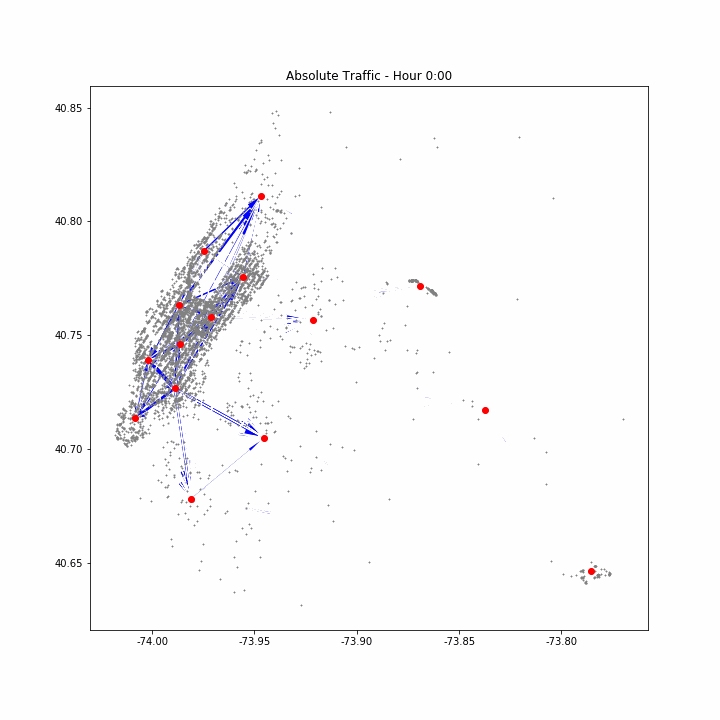

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [145]:
fig, ax = plt.subplots(1, 1, figsize = (10,10))

def animate(hour):
    ax.clear()
    ax.set_title('Absolute Traffic - Hour ' + str(int(hour)) + ':00')    
    plt.figure(figsize = (10,10));
    for label in km_df.label.unique():
        ax.plot(km_df.longitude[km_df.label == label],km_df.latitude[km_df.label == label],'.', alpha = 1, markersize = 2, color = 'gray');
        ax.plot(kmeans.cluster_centers_[label,0],kmeans.cluster_centers_[label,1],'o', color = 'r');


    for label in clusters.label:
        for dest_label in clusters.label:
            num_of_rides = len(df_train[(df_train.pickup_cluster == label) & (df_train.dropoff_cluster == dest_label) & (df_train.pickup_hour == hour)])
            dist_x = clusters.x[clusters.label == label].values[0] - clusters.x[clusters.label == dest_label].values[0]
            dist_y = clusters.y[clusters.label == label].values[0] - clusters.y[clusters.label == dest_label].values[0]
            pct = np.true_divide(num_of_rides,len(df))
            arr = Arrow(clusters.x[clusters.label == label].values, clusters.y[clusters.label == label].values, -dist_x, -dist_y, edgecolor='white', width = 15*pct)
            ax.add_patch(arr)
            arr.set_facecolor('b')


ani = animation.FuncAnimation(fig,animate,sorted(df_train.pickup_hour.unique()), interval = 1000)
plt.close()
ani.save('animation1.gif', writer='imagemagick', fps=2)
filename = 'animation1.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

MovieWriter imagemagick unavailable. Trying to use pillow instead.
/Users/shaswatrajput/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



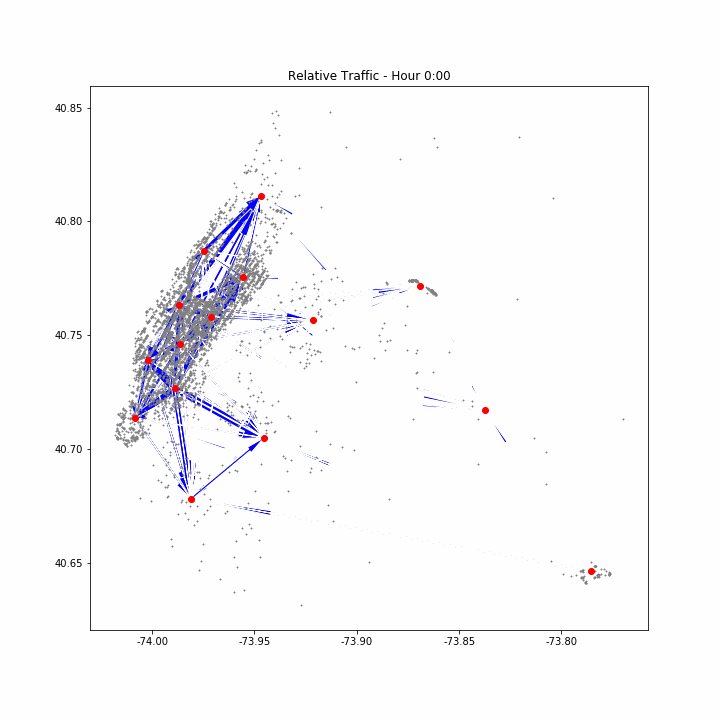

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [144]:

fig, ax = plt.subplots(1, 1, figsize = (10,10))

def animate(hour):
    ax.clear()
    ax.set_title('Relative Traffic - Hour ' + str(int(hour)) + ':00')    
    plt.figure(figsize = (10,10))
    for label in km_df.label.unique():
        ax.plot(km_df.longitude[km_df.label == label],km_df.latitude[km_df.label == label],'.', alpha = 1, markersize = 2, color = 'gray')
        ax.plot(kmeans.cluster_centers_[label,0],kmeans.cluster_centers_[label,1],'o', color = 'r')


    for label in clusters.label:
        for dest_label in clusters.label:
            num_of_rides = len(df_train[(df_train.pickup_cluster == label) & (df_train.dropoff_cluster == dest_label) & (df_train.pickup_hour == hour)])
            dist_x = clusters.x[clusters.label == label].values[0] - clusters.x[clusters.label == dest_label].values[0]
            dist_y = clusters.y[clusters.label == label].values[0] - clusters.y[clusters.label == dest_label].values[0]
            pct = np.true_divide(num_of_rides,len(df_train[df_train.pickup_hour == hour]))
            arr = Arrow(clusters.x[clusters.label == label].values, clusters.y[clusters.label == label].values, -dist_x, -dist_y, edgecolor='white', width = pct)
            ax.add_patch(arr)
            arr.set_facecolor('b')


ani = animation.FuncAnimation(fig,animate,sorted(df_train.pickup_hour.unique()), interval = 1000)
plt.close()
ani.save('animation.gif', writer='imagemagick', fps=2)
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

### We can see that in the morning most of the traffic is in Manhattan island.

The share of taxis travelling to Brooklyn area becomes much larger in the late evening. Since there's no similar movement in the morning hours (in the opposite direction), this is unlikely to be the result of commuting. Instead, and since the traffic is mostly seen after 22:00, these are probably people going out.

Since the arrows represent the relative traffic in the relevant hour, it is also possible that the increasing width of the arrows leading to Brooklyn may simply be a result of the reduction in the rides in Manhattan, due to the commercial character of big parts of it. But when looking at the absolute traffic, the arrows from Manhattan to Brooklyn are barely seen for the most part of the day.

In the very early morning, most of the traffic is to and from the two airports. As we can learn from the absolute graph, this is merely the result of decrease in traffic in the other parts of town.

### Analysis of Neighbourhood 

In [147]:
neighborhood = {-74.0019368351: 'Chelsea',-73.837549761: 'Queens',-73.7854240738: 'JFK',-73.9810421975:'Midtown-North-West',-73.9862336241: 'East Village',
                -73.971273324:'Midtown-North-East',-73.9866739677: 'Brooklyn-parkslope',-73.8690098118: 'LaGuardia',-73.9890572967:'Midtown',-74.0081765545: 'Downtown'
                ,-73.9213024854: 'Queens-Astoria',-73.9470256923: 'Harlem',-73.9555565018: 'Uppe East Side',
               -73.9453487097: 'Brooklyn-Williamsburgt',-73.9745967889:'Upper West Side'}
rides_df = pd.DataFrame(columns = neighborhood.values())
rides_df['name'] = neighborhood.values()

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(np.array(list(neighborhood.keys())).reshape(-1, 1), list(neighborhood.values()))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [150]:
df_train['pickup_neighborhood'] = neigh.predict(df_train.pickup_longitude.values.reshape(-1,1))
df_train['dropoff_neighborhood'] = neigh.predict(df_train.dropoff_longitude.values.reshape(-1,1))

for col in rides_df.columns[:-1]:
    rides_df[col] = rides_df.name.apply(lambda x: len(df_train[(df_train.pickup_neighborhood == x) & (df_train.dropoff_neighborhood == col)]))

In [152]:
rides_df.index = rides_df.name
rides_df = rides_df.drop('name', axis = 1)

/Users/shaswatrajput/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning:


Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.



Text(0.5, 1.0, 'Inbound and Outbound rides for each cluster')

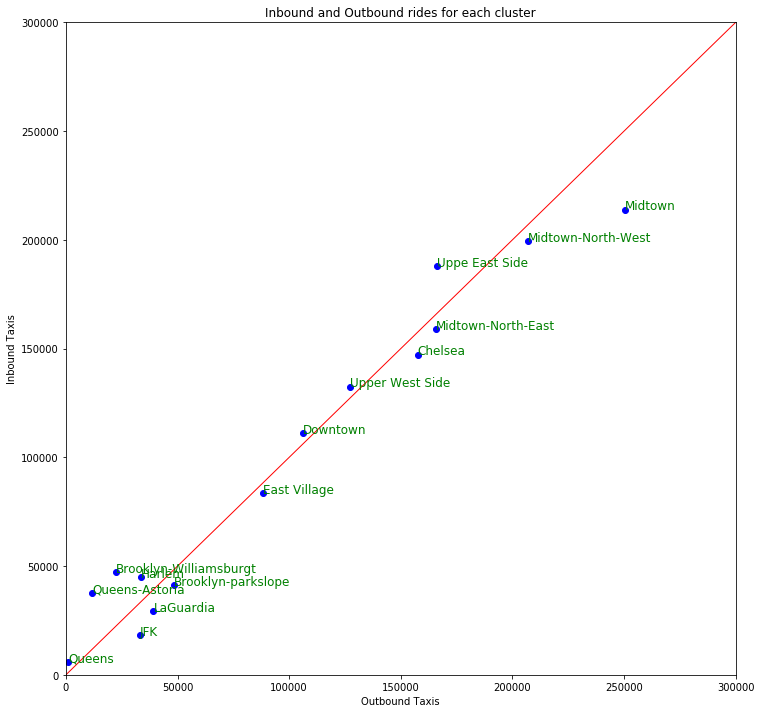

In [153]:
fig,ax = plt.subplots(figsize = (12,12))
for i in range(len(rides_df)):  
    ax.plot(rides_df.sum(axis = 1)[i],rides_df.sum(axis = 0)[i],'o', color = 'b')
    ax.annotate(rides_df.index.tolist()[i], (rides_df.sum(axis = 1)[i],rides_df.sum(axis = 0)[i]), color = 'g', fontsize = 12)

ax.plot([0,300000],[0,300000], color = 'r', linewidth = 1)
ax.grid('off')
ax.set_xlim([0,300000])
ax.set_ylim([0,300000])
ax.set_xlabel('Outbound Taxis')
ax.set_ylabel('Inbound Taxis')
ax.set_title('Inbound and Outbound rides for each cluster')

We can see that the inbound-outbound ratio for each neighborhood is relatively balanced.

The two airports have more outbound rides than inbound, which makes sense - drivers would probably go to the airport even without passengers, to have the chance to take people into the city. The residential area - Quuens, Brooklyn and Harlem have more inbound ride, whereas the more commercial and touristic areas have more outbound. with Upper East and West, being both commercial and residential, almost on the curve.

It seems that people would go into Manhattan by alternative means of transportation, but are more likely to get out of it by a cab.

In [154]:
df_train['pickup_month'] = df_train.pickup_datetime.apply(lambda x: parser.parse(x).month )

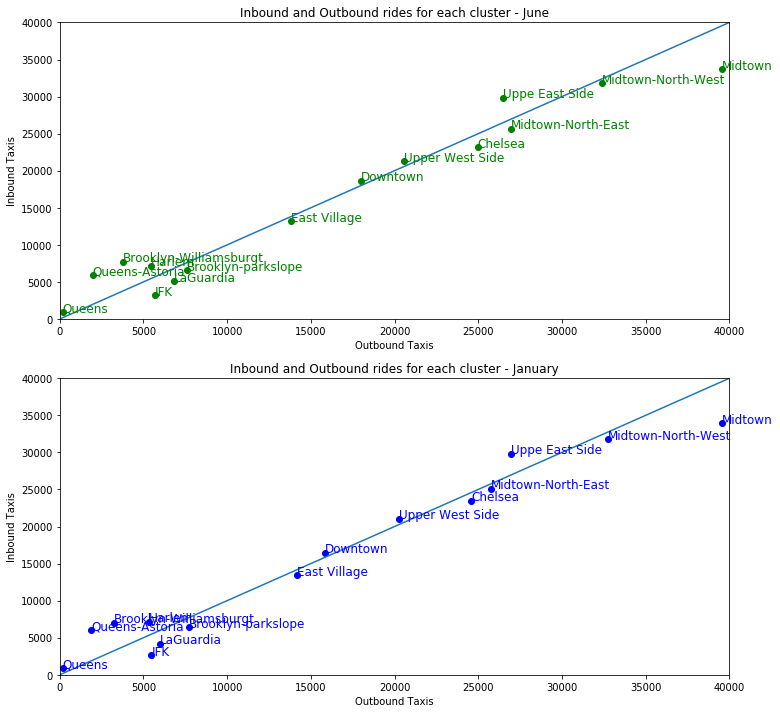

In [156]:
fig,ax = plt.subplots(2,figsize = (12,12))

rides_df = pd.DataFrame(columns = neighborhood.values())
rides_df['name'] = neighborhood.values()
rides_df.index = rides_df.name


for col in rides_df.columns[:-1]:
    rides_df[col] = rides_df.name.apply(lambda x: len(df_train[(df_train.pickup_neighborhood == x) & (df_train.dropoff_neighborhood == col) & (df_train.pickup_month == 6)]))
for i in range(len(rides_df)):  
    ax[0].plot(rides_df.sum(axis = 1)[i],rides_df.sum(axis = 0)[i],'o', color = 'g')
    ax[0].annotate(rides_df.index.tolist()[i], (rides_df.sum(axis = 1)[i],rides_df.sum(axis = 0)[i]), color = 'g', fontsize = 12)

ax[0].grid('off')
ax[0].set_xlabel('Outbound Taxis')
ax[0].set_ylabel('Inbound Taxis')
ax[0].set_title('Inbound and Outbound rides for each cluster - June')
ax[0].set_xlim([0,40000])
ax[0].set_ylim([0,40000])
ax[0].plot([0,40000],[0,40000])


for col in rides_df.columns[:-1]:
    rides_df[col] = rides_df.name.apply(lambda x: len(df_train[(df_train.pickup_neighborhood == x) & (df_train.dropoff_neighborhood == col) & (df_train.pickup_month == 1)]))
rides_df = rides_df.drop('name', axis = 1)
for i in range(len(rides_df)):  
    ax[1].plot(rides_df.sum(axis = 1)[i],rides_df.sum(axis = 0)[i],'o', color = 'b')
    ax[1].annotate(rides_df.index.tolist()[i], (rides_df.sum(axis = 1)[i],rides_df.sum(axis = 0)[i]), color = 'b', fontsize = 12)

ax[1].grid('off')
ax[1].set_xlabel('Outbound Taxis')
ax[1].set_ylabel('Inbound Taxis')
ax[1].set_title('Inbound and Outbound rides for each cluster - January')
ax[1].set_xlim([0,40000])
ax[1].set_ylim([0,40000])
ax[1].plot([0,40000],[0,40000])

## Random Forest Modelling

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [65]:
X=df_train[['vendor_id',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'pickup_hr', 'pickup_min',
       'pickup_sec', 'dropoff_hr', 'dropoff_min', 'dropoff_sec', 'pickup_day',
       'pickup_month', 'pickup_year', 'dropoff_day', 'dropoff_month',
       'dropoff_year']]
y=df_train['log_trip duration']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
rf = RandomForestRegressor()

In [69]:
rf.fit(X_train,y_train)

/Users/shaswatrajput/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [70]:
pred2 = rf.predict(X_test)

In [72]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred2))
print('MSE:', metrics.mean_squared_error(y_test, pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred2)))

MAE: 0.25473578096263305
MSE: 0.16552252282252064
RMSE: 0.40684459296212927


In [74]:
from sklearn.metrics import r2_score
r2_score(y_test, pred2)

0.7389279133448711

/Users/shaswatrajput/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


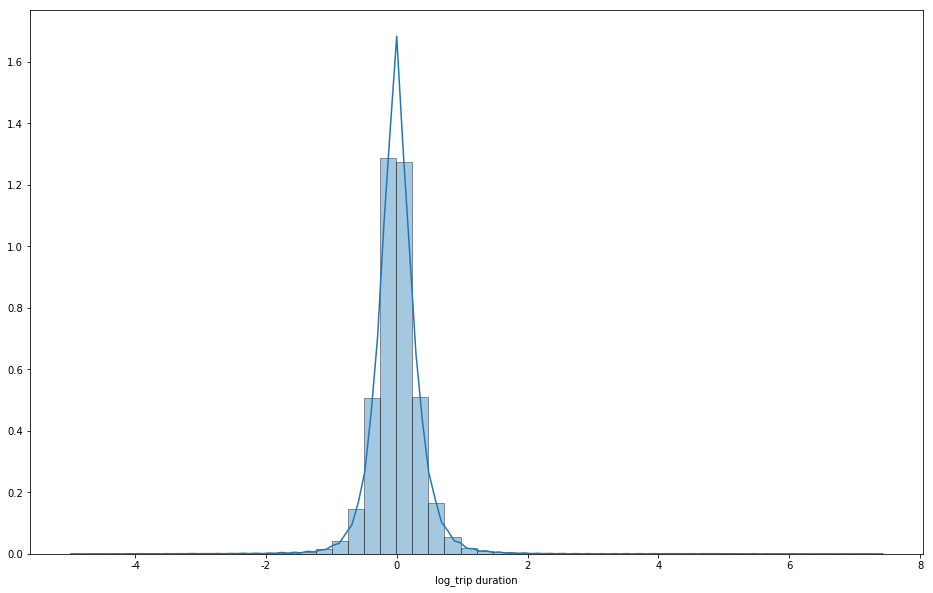

In [75]:
sns.distplot((y_test-pred2),bins=50)